In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
#read the csv into a dataframe

loan = pd.read_csv('loan.csv')
loan.head()

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [129]:
#the datatypes of all columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [130]:
loan.shape

(39717, 111)

In [131]:
#drop duplicate observations
loan = loan.drop_duplicates()
loan.shape

#no duplicates found

(39717, 111)

In [132]:
# Let's check null values
loan.isnull().sum()
#We have no records for majority of the columns...
#Let's drop those columns

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## Removing unnecessary columns

### 1 Removing Null Values

In [133]:
#Let's create a new dataframe without those columns
data = loan.loc[:,round(100 * (loan.isnull().sum() / len(loan)),2) != 100]

In [134]:
data.shape

(39717, 57)

In [135]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [136]:
#let's now check the null values
round(100 * (data.isnull().sum() / len(loan)),2)
# we still see few null values

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [137]:
#lets check for those higher null columns....
data.loc[:,round(100 * (data.isnull().sum() / len(loan)),2) > 90].head()

,mths_since_last_record,next_pymnt_d
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,Jun-16


In [138]:
#let's also drop this columsn as they are of no use...
data = data.loc[:,round(100 * (data.isnull().sum() / len(loan)),2) < 90]
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [139]:
#let's now check the null values
round(100 * (data.isnull().sum() / len(loan)),2)
# we still see few null values

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [140]:
# Let's remove columns that have no relevance
data.drop(columns=['url','desc','pymnt_plan','zip_code','addr_state','title'],axis=1,inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2 - Let's now check the unique value's of each columns

In [141]:
#data.nunique()
#Let's drop columns have only one unique value...as they don't have any significant impact
data = data.loc[:,data.nunique() != 1]
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [142]:
#get the count of unique values of each column
data.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymn

In [143]:
#get the count of null values in each row by index - row 4714 has 4 null values
data.isnull().sum(axis=1).sort_values(ascending = False)[:15]

#wont drop any row as none of them have significantly large null values

4714     4
28547    4
11282    4
16719    4
24984    4
14839    4
27540    3
750      3
18607    3
8232     3
15563    3
11402    3
8251     3
11396    3
24247    3
dtype: int64

### Let's now check the data as we have taken care of the Null/Missing values

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
dti       

In [145]:
#filling missing values in emp_title with Job title not given
data.emp_title.fillna('Job title not given', inplace=True)  

In [146]:
#converting emp length to float
data['emp_length'] = data['emp_length'].astype('str')
data['emp_length'] = data.emp_length.str.replace('<','')
data['emp_length'] = data.emp_length.str.replace('+','')
data['emp_length'] = data.emp_length.str.replace('years','')
data['emp_length'] = data.emp_length.str.replace('year','')
data['emp_length'] = data['emp_length'].apply(lambda x: '0' if x == ' ' else x)
data['emp_length'] = data['emp_length'].astype('float')

In [147]:
data.shape

(39717, 41)

In [148]:
data['emp_length'].describe().T


count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [149]:
#amputing median for blank emp length vals
# data.emp_title.fillna(data['emp_length'].median(), inplace=True)  

data['emp_length'] = data['emp_length'].apply(lambda x: data['emp_length'].median() if x == ' ' else x)
data['emp_length'].describe().T

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [159]:
#filling missing values in months since last delinquency with 0 as missing values most likely mean the borrower has no delinquencies
data.mths_since_last_delinq.fillna(0, inplace=True) 

In [163]:
data['revol_util'] = data.revol_util.str.replace('%','')
data.revol_util.fillna(data.revol_util.median(), inplace=True)

In [165]:
#as the last credit pull status i.e.paid, delinquent, or collections is not known 
#so may not be representative of the credit score of the person, so dropping the column

data = data.drop(columns = ['last_credit_pull_d'])

In [166]:
round((data.isnull().sum()/len(data.index))*100,2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
mths_since_last_delinq     0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_re

In [167]:
data['issue_d'][:2]

0   2011-12-01
1   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [168]:
#change type of issue date to datetime
print(data['issue_d'].dtypes)
data['issue_d'] = pd.to_datetime(data['issue_d'],format='%b-%y')
print(data['issue_d'].dtypes)

datetime64[ns]
datetime64[ns]


In [169]:
#change type of issue date to datetime
print(data['earliest_cr_line'].dtypes)
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],format='%b-%y')
print(data['earliest_cr_line'].dtypes)



datetime64[ns]
datetime64[ns]


In [171]:
#convert term to int
data['term'] = data['term'].astype('str')
data['term'] = [x[1] for x in data['term'].str.split(' ')]
print(data['term'].dtype)
data['term'] = data['term'].astype(int)
data['term'].dtype

object


dtype('int32')

In [172]:
data.pub_rec_bankruptcies.fillna('0', inplace=True)  

In [173]:
round((data.isnull().sum()/len(data.index))*100,2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
mths_since_last_delinq     0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_re

In [175]:
#drop this column as it has no significance
data = data.drop(columns = ['last_pymnt_d'])


In [176]:
#filling missing values in emp_lenth with -1 to indicate these are not provided
data.emp_length.fillna(0, inplace=True)  
data['emp_length'].describe().T

data['emp_length'] = data['emp_length'].apply(lambda x: data['emp_length'].median() if x == 0 else x)
data['emp_length'].describe().T

count    39717.000000
mean         5.062492
std          3.366562
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [177]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
term,39717.0,42.418007,10.622815,36.00,36.00,36.000000,6.000000e+01,6.000000e+01
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
emp_length,39717.0,5.062492,3.366562,1.00,2.00,4.000000,9.000000e+00,1.000000e+01
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01


In [178]:
corr = data.corr().copy()

## Let's now remove columns that have very high correlation with columns

In [179]:
col = ['member_id','funded_amnt','loan_amnt','out_prncp_inv','total_pymnt','total_rec_int','pub_rec_bankruptcies']
data.drop(columns=col,axis=1,inplace=True)
corr = data.corr().copy()

In [180]:
data.corr()

,id,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
id,1.000000,0.249547,0.218589,0.086587,0.108975,0.008731,0.095983,-0.008644,-0.042378,-0.014346,...,-0.019440,0.008763,0.042149,0.180619,0.220838,0.112213,-0.055082,0.033426,-0.013359,0.122365
funded_amnt_inv,0.249547,1.000000,0.360747,0.905039,0.165213,0.254375,0.074689,-0.038501,-0.005712,-0.045886,...,-0.053214,0.290797,0.242854,0.203688,0.913257,0.845848,0.027172,0.123759,0.060358,0.442604
term,0.218589,0.360747,1.000000,0.101973,0.112153,0.046675,0.082426,0.006350,0.041206,0.004711,...,0.007233,0.072367,0.096305,0.226003,0.349767,0.221642,0.010908,0.101351,0.031731,0.232915
installment,0.086587,0.905039,0.101973,1.000000,0.126416,0.270874,0.054186,-0.019657,0.009722,-0.029870,...,-0.046532,0.312679,0.230824,0.125082,0.817416,0.850773,0.056709,0.118152,0.075467,0.401688
emp_length,0.108975,0.165213,0.112153,0.126416,1.000000,0.114117,0.050736,0.015304,0.008768,0.038921,...,0.058153,0.153138,0.205073,0.052455,0.150173,0.130701,-0.015518,0.024842,0.006309,0.078228
annual_inc,0.008731,0.254375,0.046675,0.270874,0.114117,1.000000,-0.122732,0.023083,0.033908,0.018026,...,-0.018689,0.279961,0.235771,0.033573,0.247119,0.259571,0.006243,0.021589,0.015604,0.140401
dti,0.095983,0.074689,0.082426,0.054186,0.050736,-0.122732,1.000000,-0.034452,0.001405,-0.016908,...,-0.004621,0.228743,0.229881,0.036095,0.071647,0.041316,-0.011781,0.024878,0.011033,0.005212
delinq_2yrs,-0.008644,-0.038501,0.006350,-0.019657,0.015304,0.023083,-0.034452,1.000000,0.008091,0.004360,...,0.007463,-0.055125,0.067892,-0.003008,-0.028976,-0.038795,0.030609,0.012315,0.013912,-0.012149
inq_last_6mths,-0.042378,-0.005712,0.041206,0.009722,0.008768,0.033908,0.001405,0.008091,1.000000,0.012693,...,0.024802,-0.022381,0.111499,-0.012106,-0.020277,-0.023433,0.031215,0.018972,0.012420,0.028514
mths_since_last_delinq,-0.014346,-0.045886,0.004711,-0.029870,0.038921,0.018026,-0.016908,0.004360,0.012693,1.000000,...,0.059880,-0.066424,0.085867,-0.012297,-0.032908,-0.046399,0.026166,0.000066,-0.000737,-0.018209


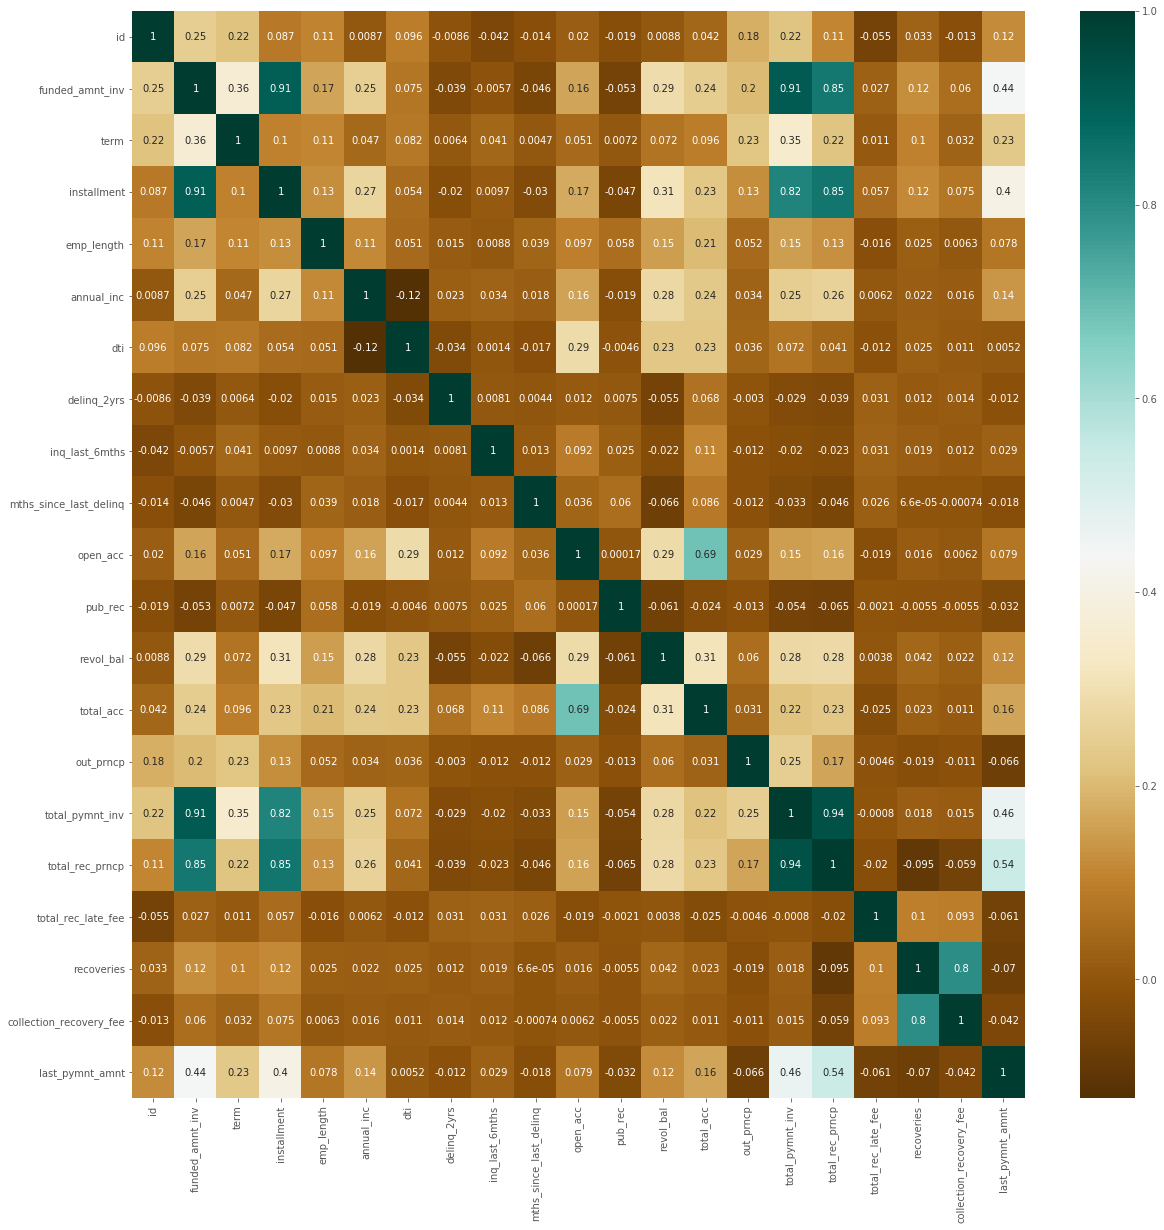

In [181]:
fig = plt.figure(figsize=[20,20])
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,cmap="BrBG")

In [182]:
data.head()

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,4975.0,36,10.65%,162.87,B,B2,Job title not given,10.0,RENT,...,13648,83.70,9,0.00,5833.84,5000.00,0.00,0.00,0.00,171.62
1,1077430,2500.0,60,15.27%,59.83,C,C4,Ryder,1.0,RENT,...,1687,9.40,4,0.00,1008.71,456.46,0.00,117.08,1.11,119.66
2,1077175,2400.0,36,15.96%,84.33,C,C5,Job title not given,10.0,RENT,...,2956,98.50,10,0.00,3005.67,2400.00,0.00,0.00,0.00,649.91
3,1076863,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,...,5598,21,37,0.00,12231.89,10000.00,16.97,0.00,0.00,357.48
4,1075358,3000.0,60,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,...,27783,53.90,38,524.06,3513.33,2475.94,0.00,0.00,0.00,67.79


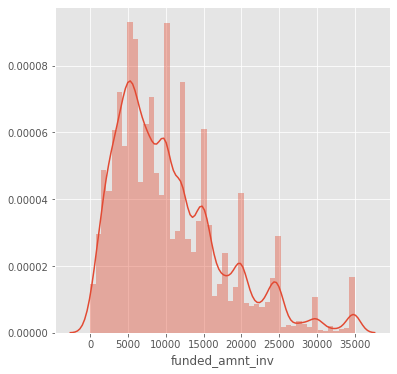

In [183]:
fig = plt.figure(figsize=[6,6])
sns.distplot(data['funded_amnt_inv'])
#The data is skewed at the left side..which means the loan getting passed/people applying for loan amount is less...

Text(0, 0.5, 'Count')

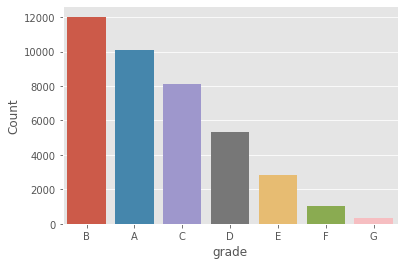

In [184]:
sns.countplot(x='grade',data=data,order=data['grade'].sort_values(ascending=False).value_counts().index)
plt.ylabel('Count')

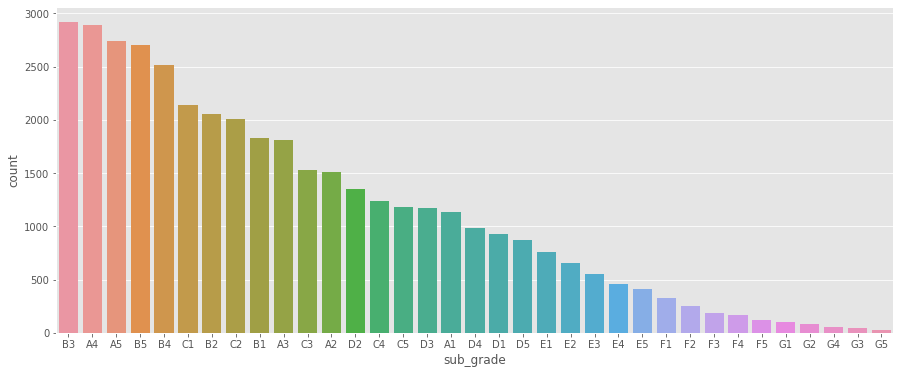

In [185]:
fig = plt.figure(figsize=[15,6])
sns.countplot(x='sub_grade',data=data,order=data['sub_grade'].sort_values(ascending=False).value_counts().index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

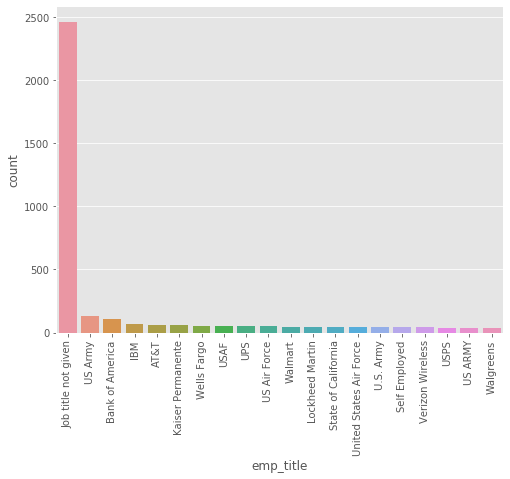

In [186]:
fig = plt.figure(figsize=[8,6])
sns.countplot(x='emp_title',data=data,
              order=data['emp_title'].sort_values(ascending=False).value_counts().index[:20])
plt.xticks(rotation=90)

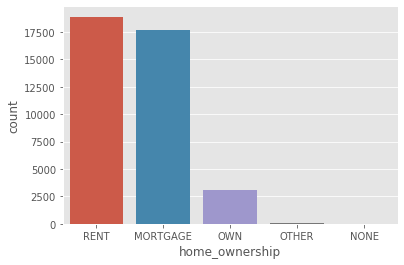

In [187]:
#There are majority of rented loan requestor.... 
sns.countplot(x='home_ownership',data=data,
             order=data['home_ownership'].sort_values(ascending=False).value_counts().index)

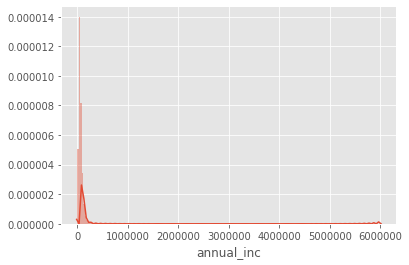

In [188]:
import math
bins = round(math.sqrt(data.shape[0]))
sns.distplot(data['annual_inc'],bins=bins)

#The annual income is skewed at the left..
#We will have to check the data and confirm if we have outlirs or not..

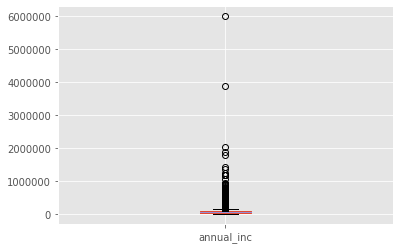

In [189]:
data['annual_inc'].plot(kind='box')
#It's clearly visble that there are outliers in the annual_inc column

## Removing Outliers from `annual_inc`

In [190]:
data['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [191]:
data['annual_inc'].describe(percentiles=[0.1,0.15,0.2])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
10%      3.000000e+04
15%      3.400000e+04
20%      3.750000e+04
50%      5.900000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [192]:
data = data[ (data['annual_inc'] < 40000) & (data['annual_inc'] > 500)]

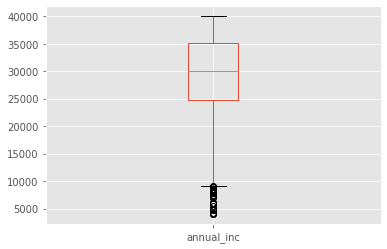

In [193]:
data['annual_inc'].plot(kind='box')
#It's clearly visble that there are outliers in the annual_inc column

In [194]:
#using the log log plot to understand the distribution of annual income better

df = data.groupby('annual_inc').count()[['id']]
df["Rank"] = df["id"].rank(ascending=True) 
df.sort_values("id", inplace = True,ascending=False) 

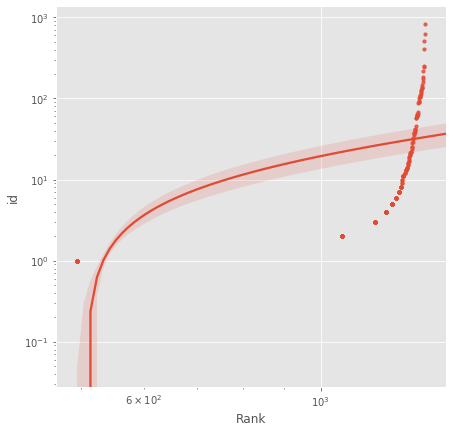

In [195]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("Rank", "id", df, ax=ax, scatter_kws={"s": 10})

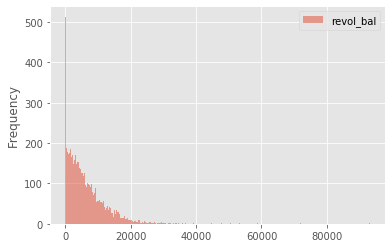

In [196]:
data[['revol_bal']].plot.hist(bins=500, alpha=0.5)
#the revolving balance frequencyshows a sharp peak around 0. the frequency decreases as revolving balance increases.
#this shows lending club may not lend to people having high revolving balance

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


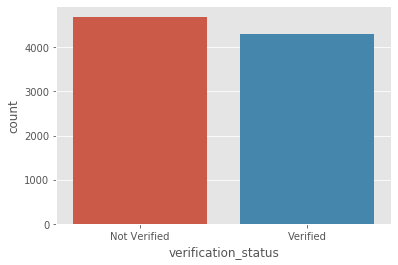

In [197]:
data['verification_status'] = data['verification_status'].replace('Source Verified','Verified')
round(100 * ((data['verification_status'].sort_values(ascending=True).value_counts())/len(data['verification_status'])),2)

sns.countplot('verification_status',data=data,
              order=data['verification_status'].sort_values(ascending=True).value_counts().index)

Fully Paid     80.52
Charged Off    17.72
Current         1.76
Name: loan_status, dtype: float64

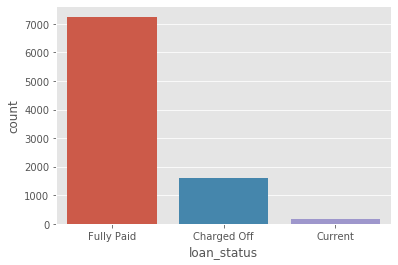

In [198]:
# The data for charged off is less but it also depends on the amount pendong..
# We need to find the issue for why the laon_status as 'charged_off'
sns.countplot('loan_status',data=data,
              order=data['loan_status'].sort_values(ascending=True).value_counts().index)
round(100 * (data['loan_status'].sort_values(ascending=True).value_counts()/data.shape[0]),2)

Text(0, 0.5, 'Count')

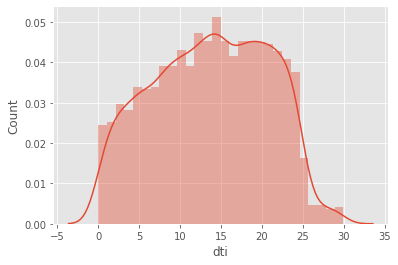

In [199]:
#It is following a normal distribution....:)
sns.distplot(data['dti'])
plt.ylabel('Count')

In [200]:
data['dti'].describe()

count    9001.000000
mean       13.712213
std         6.996060
min         0.000000
25%         8.190000
50%        14.040000
75%        19.500000
max        29.930000
Name: dti, dtype: float64

Text(0.5, 0, 'loan_amount')

<Figure size 432x288 with 0 Axes>

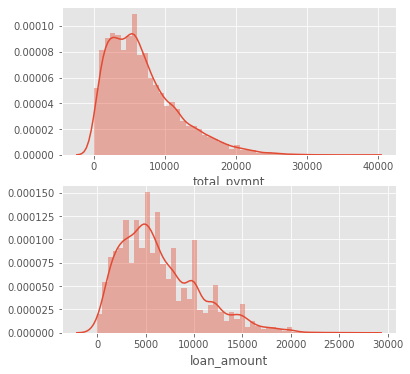

In [201]:
# From the below graphs it's visible that we are yet to recieve good amount....
plt.subplots_adjust(hspace=0.9,wspace=0.45)
fig = plt.figure(figsize=[6,6])
plt.subplot(2,1,1)
sns.distplot(data['total_pymnt_inv'])
plt.xlabel('total_pymnt')
plt.subplot(2,1,2)
sns.distplot(data['funded_amnt_inv'])
plt.xlabel('loan_amount')

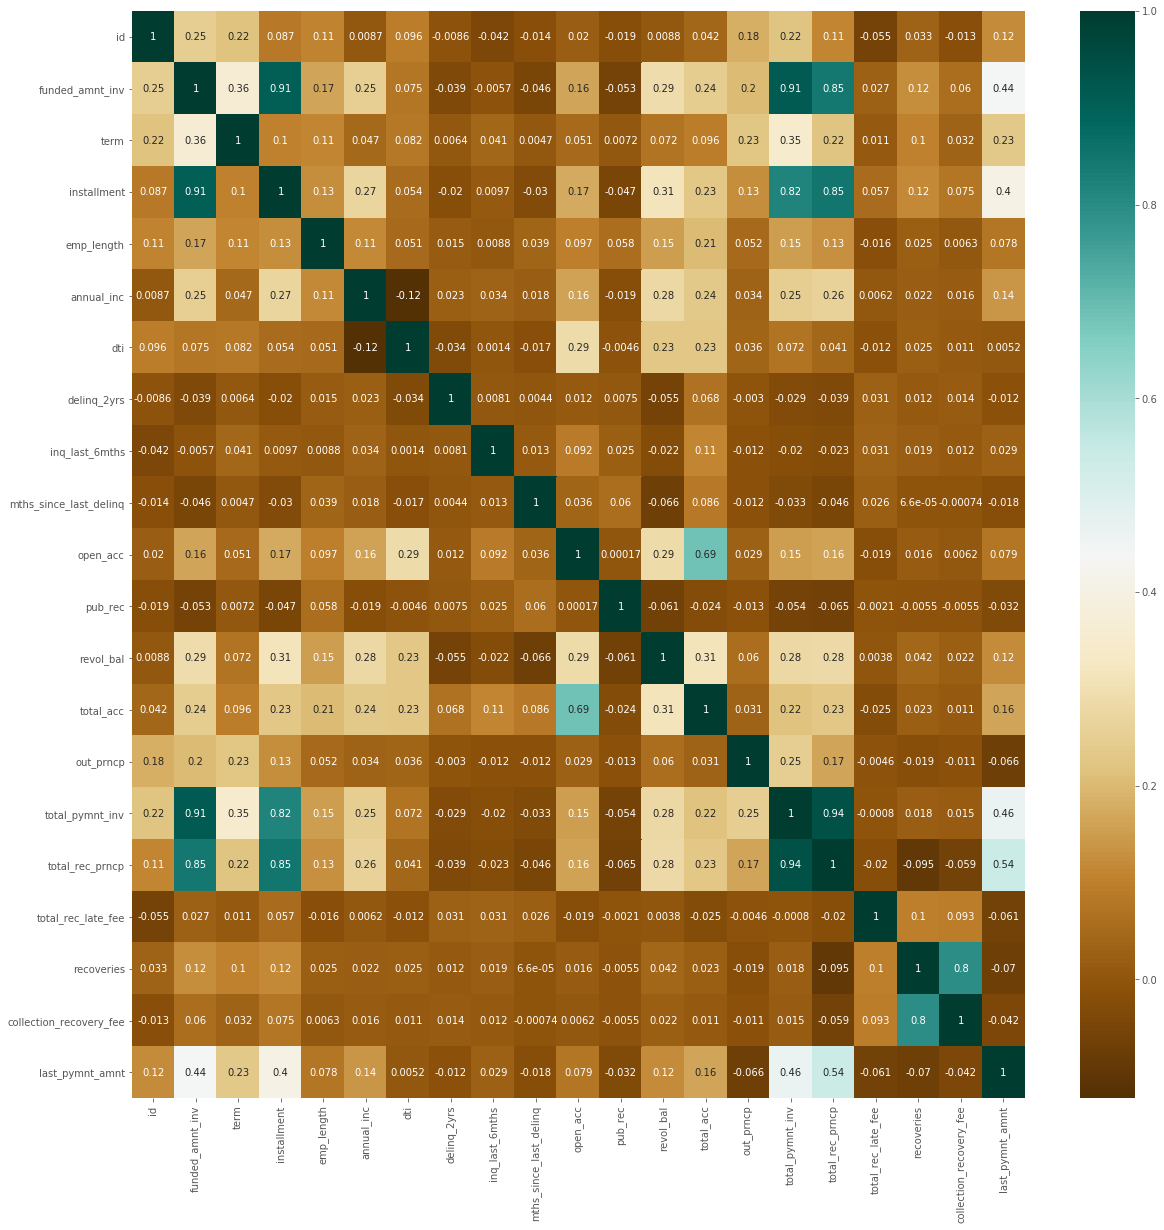

In [202]:
fig = plt.figure(figsize=[20,20])
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,cmap="BrBG")

# Derived Metrics

In [203]:
#issue year from issue date
data['issue_year'] = pd.DatetimeIndex(data['issue_d']).year
data['issue_year'][:2]

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    2011
1    2011
Name: issue_year, dtype: int64

In [204]:
#issue year from issue date
data['issue_month'] = pd.DatetimeIndex(data['issue_d']).month
data['issue_month'][:2]

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    12
1    12
Name: issue_month, dtype: int64

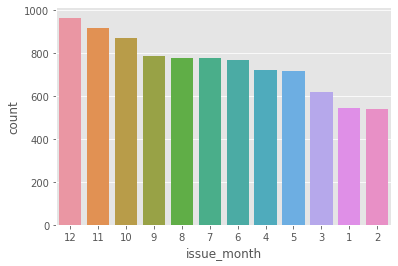

In [205]:
#a lot of people borrow in the month of dec n this follows a pattern where it decreases towards jan.
sns.countplot('issue_month',data=data,
              order=data['issue_month'].sort_values(ascending=True).value_counts().index)

In [206]:
#earliest credit line year from earliest credit line date
data['earliest_cr_line_year'] = pd.DatetimeIndex(data['earliest_cr_line']).year
data['earliest_cr_line_year'][:2]

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1985
1    1999
Name: earliest_cr_line_year, dtype: int64

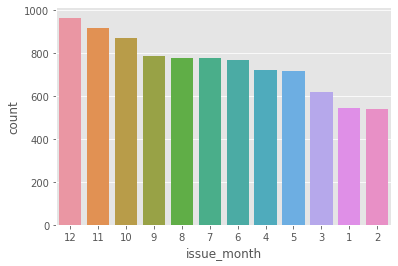

In [207]:
#a lot of people borrow in the month of dec n this follows a pattern where it decreases towards jan.
sns.countplot('issue_month',data=data,
              order=data['issue_month'].sort_values(ascending=True).value_counts().index)

In [208]:
#installation amount as a factor of annual income
data['install_factor_annual_inc'] = data['annual_inc']/(data['installment']*12)

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


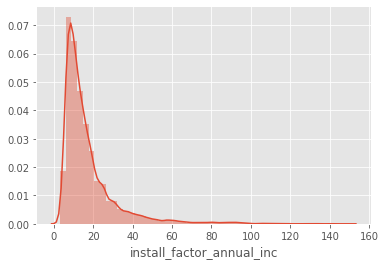

In [209]:
#the plot indicates that most people would have an annual income almost 8 times their installments.
#the plot also goes less than 0 which may indicate that people borrow more than their incomes
sns.distplot(data['install_factor_annual_inc'])

In [210]:
#creating a bin variable for dti
bins = [0, 1, 5, 10, 15,20,25, 30, 100]
data['binned_dti'] = pd.cut(data['dti'], bins)
data['binned_dti'].value_counts()

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(10, 15]     2050
(15, 20]     1998
(20, 25]     1855
(5, 10]      1656
(1, 5]       1028
(25, 30]      188
(0, 1]        148
(30, 100]       0
Name: binned_dti, dtype: int64

In [211]:
data['annual_inc'].describe()

count     9001.000000
mean     29364.539561
std       7321.454337
min       4000.000000
25%      24696.000000
50%      30000.000000
75%      35088.000000
max      39999.000000
Name: annual_inc, dtype: float64

In [212]:
#creating a bin variable for annual_inc
bins = [4000, 10000, 20000, 30000, 40000]
data['binned_annual_inc'] = pd.cut(data['annual_inc'], bins)

#lending clubs lends to people with a high income range
data['binned_annual_inc'].value_counts()

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(30000, 40000]    4377
(20000, 30000]    3435
(10000, 20000]    1090
(4000, 10000]       98
Name: binned_annual_inc, dtype: int64

In [213]:
bins = [5.0, 7.0,10.0, 12.0,15.0, 17.0,20.0,22.0 ,25.0,28.0,30.0]
data['int_rate']  = data.int_rate.str.replace('%','')
data['int_rate']  =  data['int_rate'].astype('float')
data['binned_in_rate'] = pd.cut(data['int_rate'], bins)
data['binned_in_rate'].value_counts()

C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vibhuti.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

(12.0, 15.0]    2489
(7.0, 10.0]     2135
(10.0, 12.0]    2019
(15.0, 17.0]    1021
(5.0, 7.0]       794
(17.0, 20.0]     466
(20.0, 22.0]      66
(22.0, 25.0]      11
(28.0, 30.0]       0
(25.0, 28.0]       0
Name: binned_in_rate, dtype: int64

In [214]:
data.columns

Index(['id', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'issue_year',
       'issue_month', 'earliest_cr_line_year', 'install_factor_annual_inc',
       'binned_dti', 'binned_annual_inc', 'binned_in_rate'],
      dtype='object')

In [216]:
data.to_csv('new.csv',index=False)

## BiVariate Analysis

In [217]:
data.head()

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,issue_year,issue_month,earliest_cr_line_year,install_factor_annual_inc,binned_dti,binned_annual_inc,binned_in_rate
0,1077501,4975.0,36,10.65,162.87,B,B2,Job title not given,10.0,RENT,...,0.00,0.00,171.62,2011,12,1985,12.279732,"(25, 30]","(20000, 30000]","(10.0, 12.0]"
1,1077430,2500.0,60,15.27,59.83,C,C4,Ryder,1.0,RENT,...,117.08,1.11,119.66,2011,12,1999,41.785058,"(0, 1]","(20000, 30000]","(15.0, 17.0]"
2,1077175,2400.0,36,15.96,84.33,C,C5,Job title not given,10.0,RENT,...,0.00,0.00,649.91,2011,12,2001,12.107198,"(5, 10]","(10000, 20000]","(15.0, 17.0]"
5,1075269,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,...,0.00,0.00,161.03,2011,12,2004,19.174230,"(10, 15]","(30000, 40000]","(7.0, 10.0]"
9,1071570,5350.0,60,12.69,121.45,B,B5,Starbucks,1.0,RENT,...,269.29,2.52,121.45,2011,12,2004,10.292301,"(15, 20]","(10000, 20000]","(12.0, 15.0]"


In [218]:
round(100 * (data.isnull().sum() / len(loan)),2)

id                           0.0
funded_amnt_inv              0.0
term                         0.0
int_rate                     0.0
installment                  0.0
grade                        0.0
sub_grade                    0.0
emp_title                    0.0
emp_length                   0.0
home_ownership               0.0
annual_inc                   0.0
verification_status          0.0
issue_d                      0.0
loan_status                  0.0
purpose                      0.0
dti                          0.0
delinq_2yrs                  0.0
earliest_cr_line             0.0
inq_last_6mths               0.0
mths_since_last_delinq       0.0
open_acc                     0.0
pub_rec                      0.0
revol_bal                    0.0
revol_util                   0.0
total_acc                    0.0
out_prncp                    0.0
total_pymnt_inv              0.0
total_rec_prncp              0.0
total_rec_late_fee           0.0
recoveries                   0.0
collection

In [219]:
data.loc[:,round(100 * (data.isnull().sum() / len(loan)),2) != 0].head()

,binned_dti
0,"(25, 30]"
1,"(0, 1]"
2,"(5, 10]"
5,"(10, 15]"
9,"(15, 20]"


In [220]:
data['funded_amnt_inv'].describe()

count     9001.000000
mean      6430.022252
std       4070.906698
min          0.000000
25%       3337.350000
50%       5550.000000
75%       8906.072807
max      27212.914320
Name: funded_amnt_inv, dtype: float64

In [221]:
data.head()

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,issue_year,issue_month,earliest_cr_line_year,install_factor_annual_inc,binned_dti,binned_annual_inc,binned_in_rate
0,1077501,4975.0,36,10.65,162.87,B,B2,Job title not given,10.0,RENT,...,0.00,0.00,171.62,2011,12,1985,12.279732,"(25, 30]","(20000, 30000]","(10.0, 12.0]"
1,1077430,2500.0,60,15.27,59.83,C,C4,Ryder,1.0,RENT,...,117.08,1.11,119.66,2011,12,1999,41.785058,"(0, 1]","(20000, 30000]","(15.0, 17.0]"
2,1077175,2400.0,36,15.96,84.33,C,C5,Job title not given,10.0,RENT,...,0.00,0.00,649.91,2011,12,2001,12.107198,"(5, 10]","(10000, 20000]","(15.0, 17.0]"
5,1075269,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,...,0.00,0.00,161.03,2011,12,2004,19.174230,"(10, 15]","(30000, 40000]","(7.0, 10.0]"
9,1071570,5350.0,60,12.69,121.45,B,B5,Starbucks,1.0,RENT,...,269.29,2.52,121.45,2011,12,2004,10.292301,"(15, 20]","(10000, 20000]","(12.0, 15.0]"


In [222]:
data.dtypes

id                                    int64
funded_amnt_inv                     float64
term                                  int32
int_rate                            float64
installment                         float64
grade                                object
sub_grade                            object
emp_title                            object
emp_length                          float64
home_ownership                       object
annual_inc                          float64
verification_status                  object
issue_d                      datetime64[ns]
loan_status                          object
purpose                              object
dti                                 float64
delinq_2yrs                           int64
earliest_cr_line             datetime64[ns]
inq_last_6mths                        int64
mths_since_last_delinq              float64
open_acc                              int64
pub_rec                               int64
revol_bal                       

loan_status,Charged Off,Current,Fully Paid
term,,,
36,1086.0,NaN,6138.0
60,509.0,158.0,1110.0


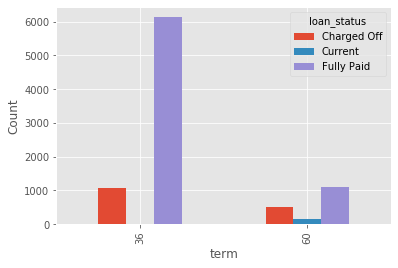

In [223]:
data.groupby(by=['term','loan_status']).count()['funded_amnt_inv'].unstack().plot.bar()
plt.ylabel('Count')
data.groupby(by=['term','loan_status']).count()['funded_amnt_inv'].unstack()
#people with a long term loans are much more likely to default

In [224]:
data.groupby(by=['loan_status','verification_status']).count()['funded_amnt_inv'].unstack()
#as per the data, verfication status doesnt really affect the loan default status

verification_status,Not Verified,Verified
loan_status,,
Charged Off,765,830
Current,50,108
Fully Paid,3876,3372


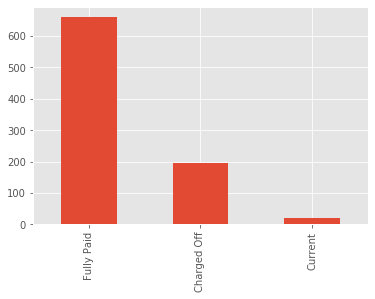

In [225]:
data[data['emp_title'] == 'Job title not given']['loan_status'].value_counts().plot(kind='bar')
#With no emp_title the risk factor here is 20% i.e. 1 out of 5 are prone to becomming charged off

In [226]:
data['emp_title'] = data['emp_title'].str.lower()
data['emp_title'] = data['emp_title'].replace(['wal mart','wal-mart'],'walmart')
data['emp_title'].value_counts()

job title not given                       876
walmart                                    77
bank of america                            34
home depot                                 29
us army                                    29
target                                     28
best buy                                   21
walgreens                                  18
self                                       16
self employed                              16
wells fargo                                14
the home depot                             13
nordstrom                                  12
retired                                    11
jp morgan chase                            11
starbucks                                  10
self-employed                              10
verizon wireless                           10
usaf                                       10
united states air force                    10
whole foods market                         10
autozone                          

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,55.0,13.0,351.0
credit_card,132.0,8.0,839.0
debt_consolidation,747.0,75.0,3257.0
educational,27.0,NaN,122.0
home_improvement,61.0,8.0,349.0
house,15.0,2.0,56.0
major_purchase,90.0,11.0,506.0
medical,36.0,1.0,149.0
moving,49.0,2.0,154.0


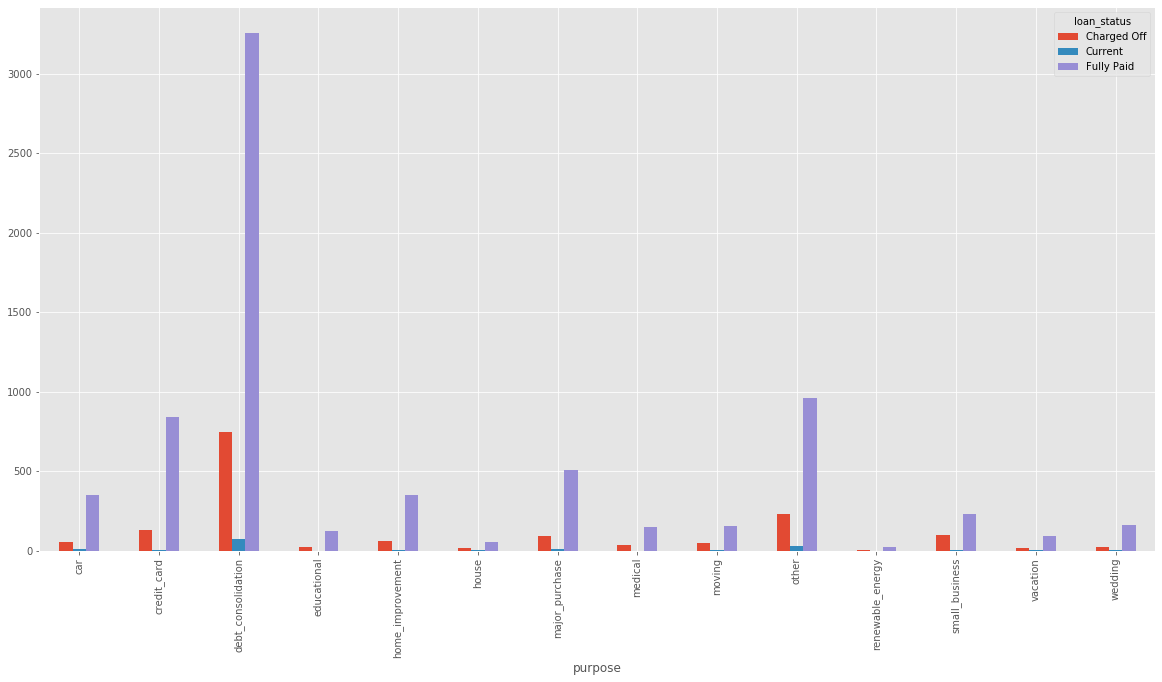

In [227]:
data.groupby(by=['purpose','loan_status']).count()['funded_amnt_inv'].unstack().plot.bar(figsize=(20,10))
data.groupby(by=['purpose','loan_status']).count()['funded_amnt_inv'].unstack()

Text(0, 0.5, 'Count')

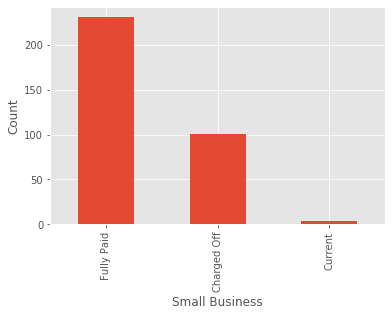

In [228]:
data[data['purpose'] == 'small_business']['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Small Business')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

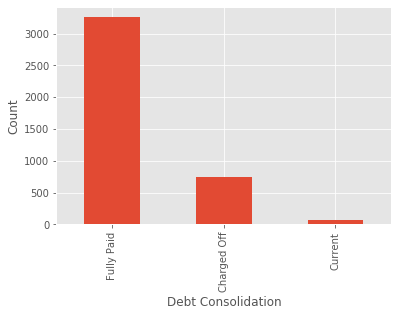

In [229]:
data[data['purpose'] == 'debt_consolidation']['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Debt Consolidation')
plt.ylabel('Count')
#people with debt consolidation are much likely to pay as compared to small businesses. 
#but this is ambiguous as small business has a small sample size as compared to debt consolidation

Text(0, 0.5, 'Count')

<Figure size 432x432 with 0 Axes>

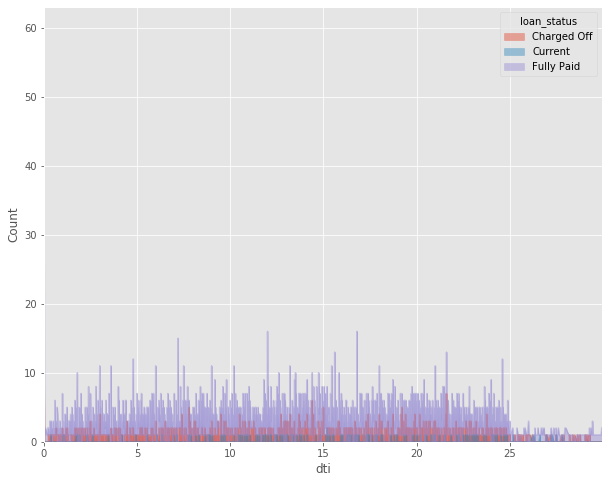

In [230]:
fig = plt.figure(figsize=[6,6])
df1 = data.groupby(by=['dti','loan_status'],sort=True).count()['funded_amnt_inv'].unstack().copy()
df1.plot(kind='area',alpha=0.45,stacked=False,figsize=(10,8))
plt.ylabel('Count')
#for higher dti values,count of people who default increases

Text(0, 0.5, 'Count')

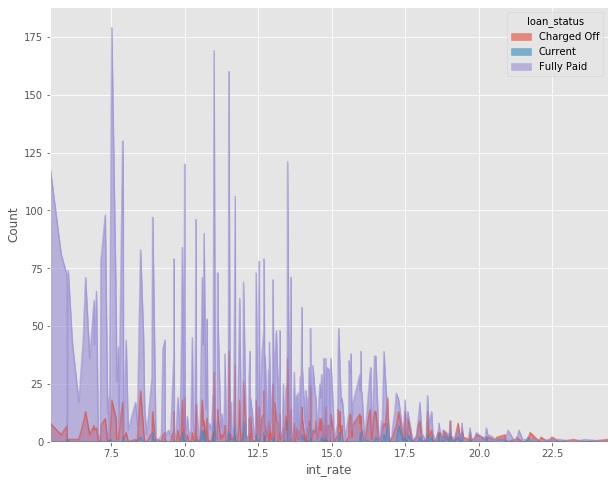

In [231]:
plt.style.use('ggplot')
df1 = data.groupby(by=['int_rate','loan_status'],sort=True).count()['funded_amnt_inv'].unstack().copy()
df1.plot(kind='area',alpha=0.6,stacked=False,figsize=(10,8))
plt.ylabel('Count')

### With the increase in `interest rate`, chances of `charged-off` are increasing which is clearly visible in the graph below

Text(0, 0.5, 'percentage_risk')

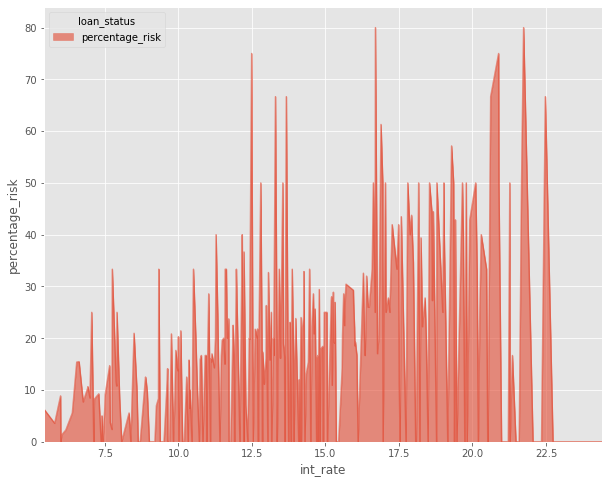

In [232]:
plt.style.use('ggplot')
df1 = data.groupby(by=['int_rate','loan_status'],sort=True).count()['funded_amnt_inv'].unstack().copy()
df1['percentage_risk'] = df1['Charged Off']/(df1['Charged Off']+df1['Fully Paid'])*100
df1[['percentage_risk']].plot(kind='area',alpha=0.6,stacked=False,figsize=(10,8))
plt.ylabel('percentage_risk')

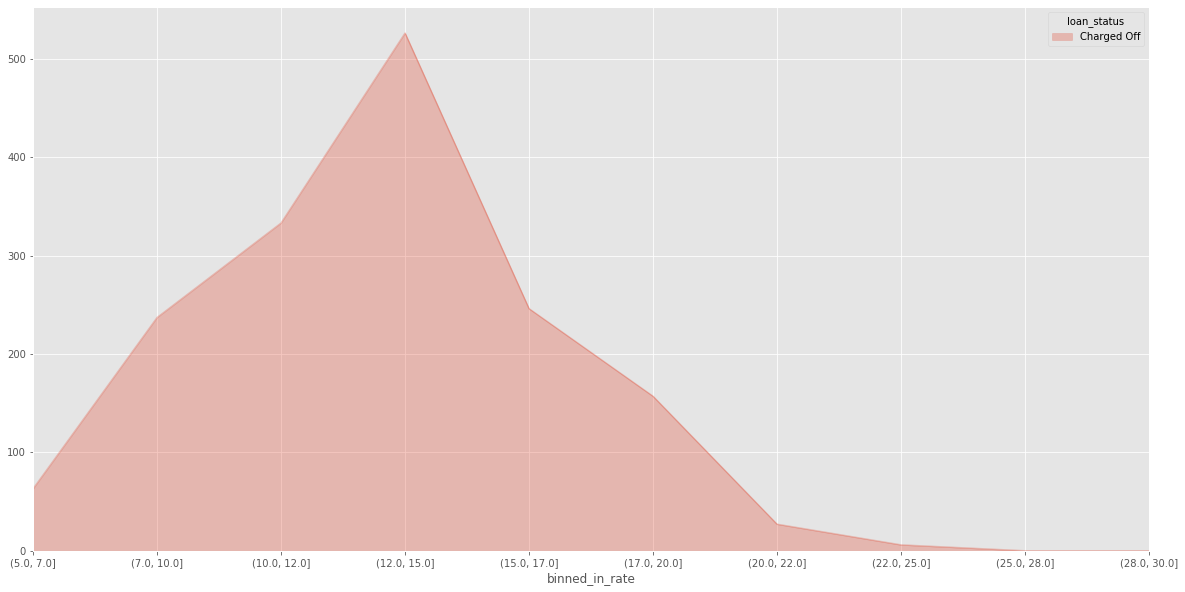

In [233]:
df1 = data.groupby(by=['binned_in_rate','loan_status'],sort=True).count()['funded_amnt_inv'].unstack().copy()
df1[['Charged Off']].plot(kind='area',alpha=0.3,stacked=True,figsize=(20,10))



## 

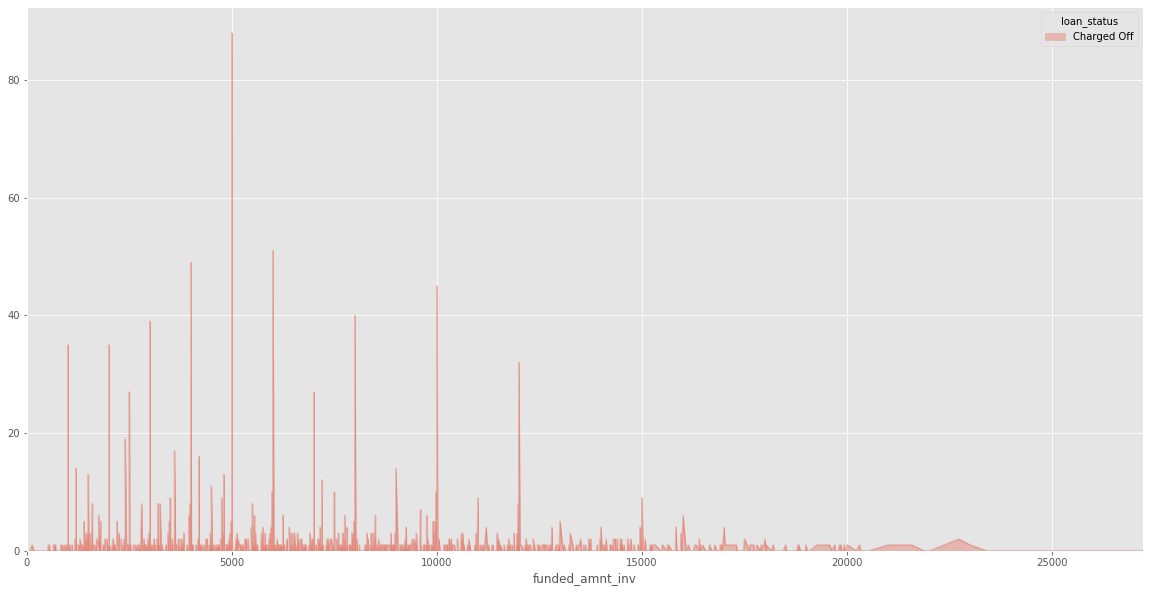

In [244]:
df1 = data.groupby(by=['funded_amnt_inv','loan_status'],sort=True).count()['int_rate'].unstack().copy()
df1[['Charged Off']].plot(kind='area',alpha=0.3,stacked=True,figsize=(20,10))


Text(0, 0.5, 'count')

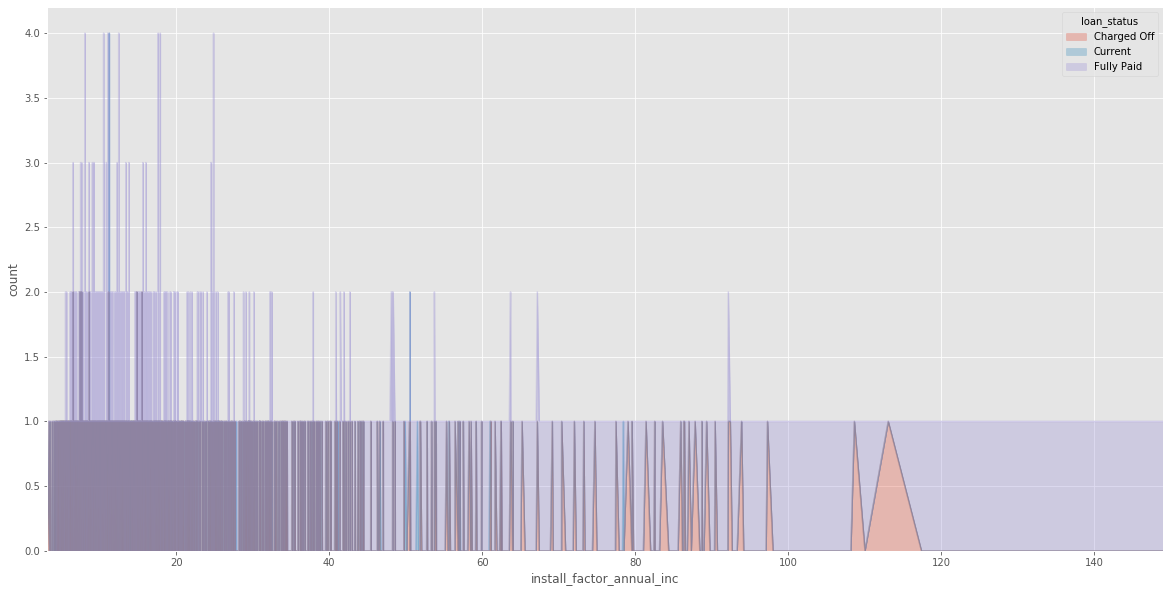

In [235]:
df1 = data.groupby(by=['install_factor_annual_inc','loan_status'],sort=True).count()['int_rate'].unstack().copy()
df1.plot(kind='area',alpha=0.3,stacked=True,figsize=(20,10))
plt.ylabel('count')
# df1[['Fully Paid']].plot(kind='area',alpha=0.3,stacked=True,figsize=(20,10))
#people whose annual income as compared to their installments is greater than 2 are much likely to fully pay
#also those whose annual income as compared to their installments is greater than 1,show low trends of defaulters

loan_status,Charged Off,Current,Fully Paid
issue_month,,,
1,86.0,NaN,457.0
2,87.0,NaN,453.0
3,89.0,NaN,528.0
4,123.0,1.0,599.0
5,146.0,17.0,554.0
6,149.0,17.0,603.0
7,135.0,19.0,621.0
8,126.0,19.0,633.0
9,148.0,16.0,622.0


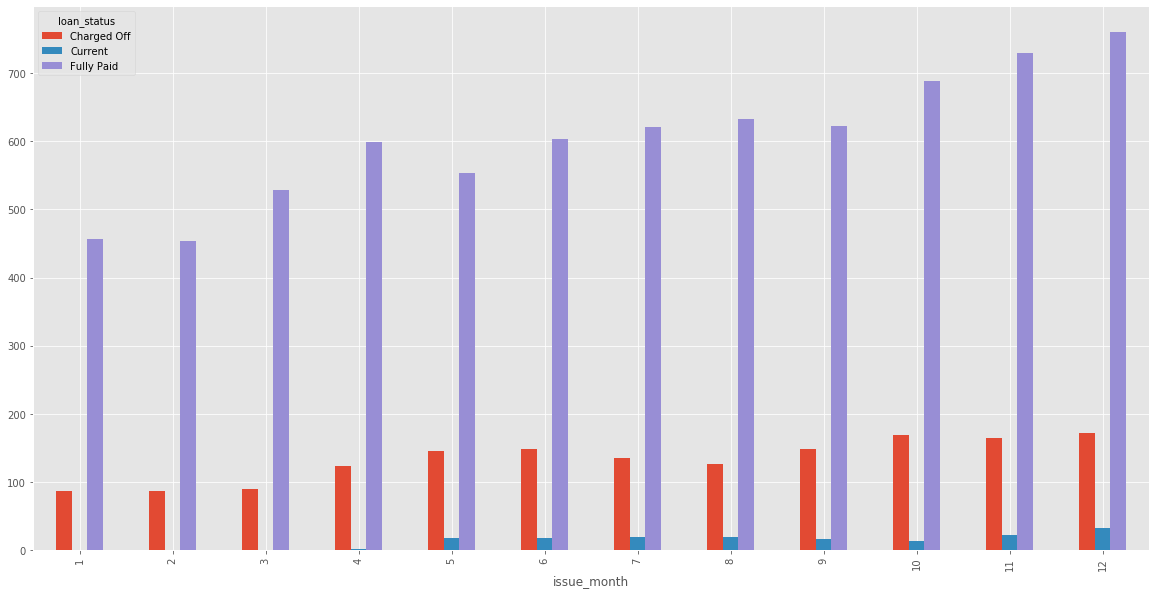

In [236]:
data.groupby(by=['issue_month','loan_status']).count()['funded_amnt_inv'].unstack().plot.bar(figsize=(20,10))
data.groupby(by=['issue_month','loan_status']).count()['funded_amnt_inv'].unstack()

Text(0, 0.5, 'charged_compared_fullypaid')

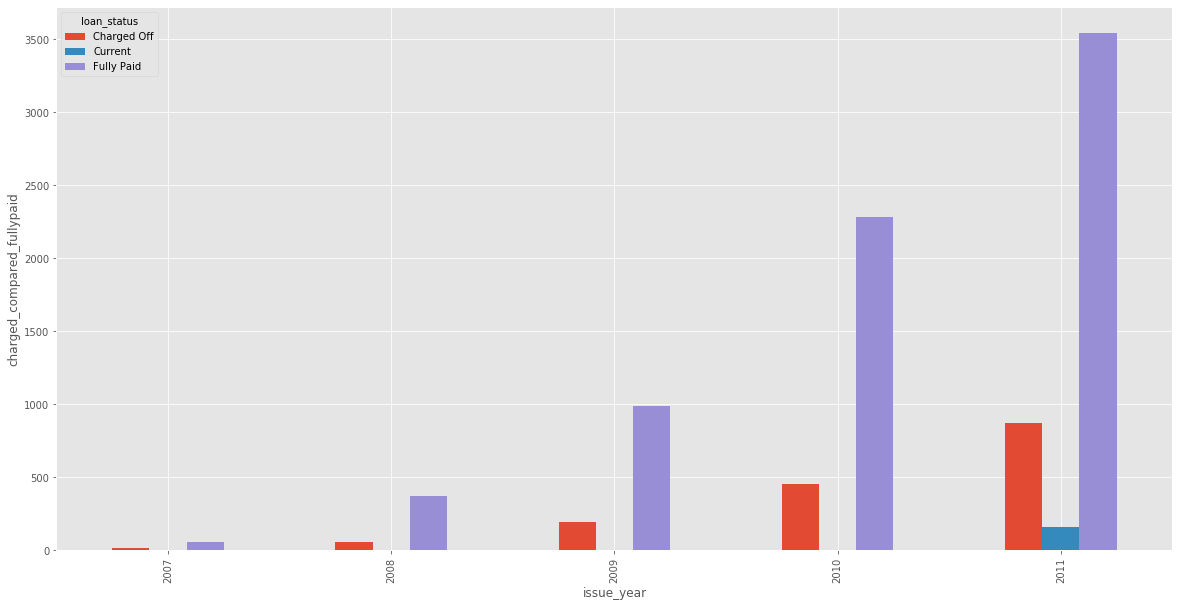

In [237]:
data.groupby(by=['issue_year','loan_status']).count()['funded_amnt_inv'].unstack().plot.bar(figsize=(20,10))
df = data.groupby(by=['issue_year','loan_status']).count()['funded_amnt_inv'].unstack()
df['charged_compared_fullypaid'] = df['Fully Paid']/df['Charged Off']
df
plt.ylabel('charged_compared_fullypaid')

#people who borrowed before 2008 show very few charged off compared to fully paid

#people who borrowed in 2008 show a spurge in charged off compared to fully paid

#people who borrowed after 2008, tend to show a declining rate of charged off compared to fully paid

#this could be owing to the recession in 2008

Text(0, 0.5, 'Count')

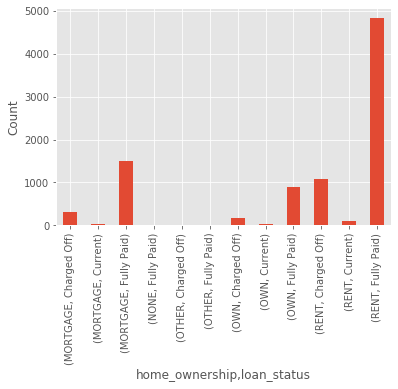

In [238]:
plt.style.use('ggplot')
data.groupby(by=['home_ownership','loan_status']).count()['id'].plot(kind='bar',stacked=True)
plt.ylabel('Count')

loan_status,Charged Off,Current,Fully Paid,charged_compared_fullypaid
home_ownership,,,,
MORTGAGE,322.0,33.0,1502.0,4.664596
NONE,NaN,NaN,1.0,NaN
OTHER,5.0,NaN,19.0,3.800000
OWN,180.0,30.0,902.0,5.011111
RENT,1088.0,95.0,4824.0,4.433824


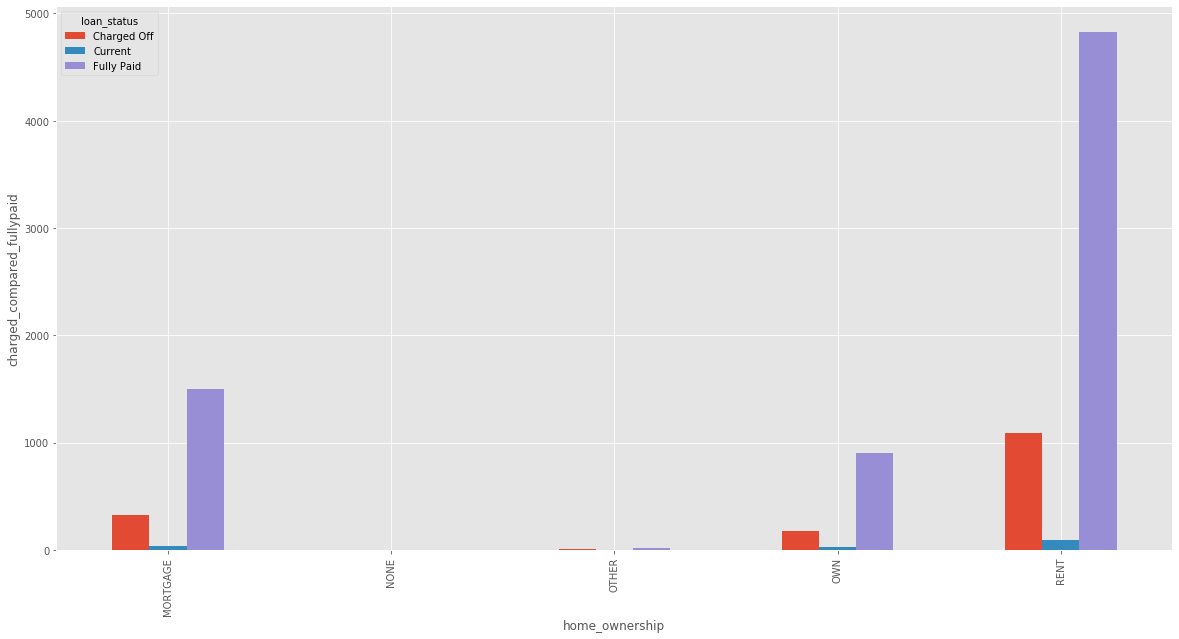

In [239]:
data.groupby(by=['home_ownership','loan_status']).count()['funded_amnt_inv'].unstack().plot.bar(figsize=(20,10))
plt.ylabel('charged_compared_fullypaid')
df = data.groupby(by=['home_ownership','loan_status']).count()['funded_amnt_inv'].unstack()
df['charged_compared_fullypaid'] = df['Fully Paid']/df['Charged Off']
df


Text(0, 0.5, 'Count')

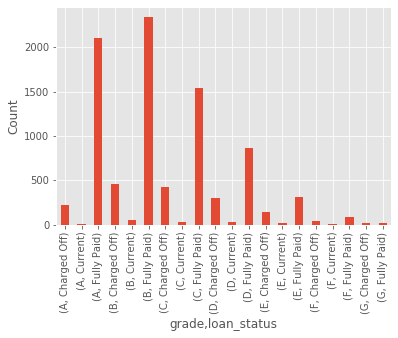

In [240]:
data.groupby(by=['grade','loan_status']).count()['id'].plot(kind='bar',stacked=True)
plt.ylabel('Count')

loan_status,Charged Off,Current,Fully Paid,charged_compared_fullypaid
grade,,,,
A,221.0,9.0,2100.0,9.502262
B,457.0,55.0,2335.0,5.109409
C,421.0,34.0,1536.0,3.648456
D,302.0,32.0,866.0,2.867550
E,136.0,22.0,316.0,2.323529
F,41.0,6.0,81.0,1.975610
G,17.0,NaN,14.0,0.823529


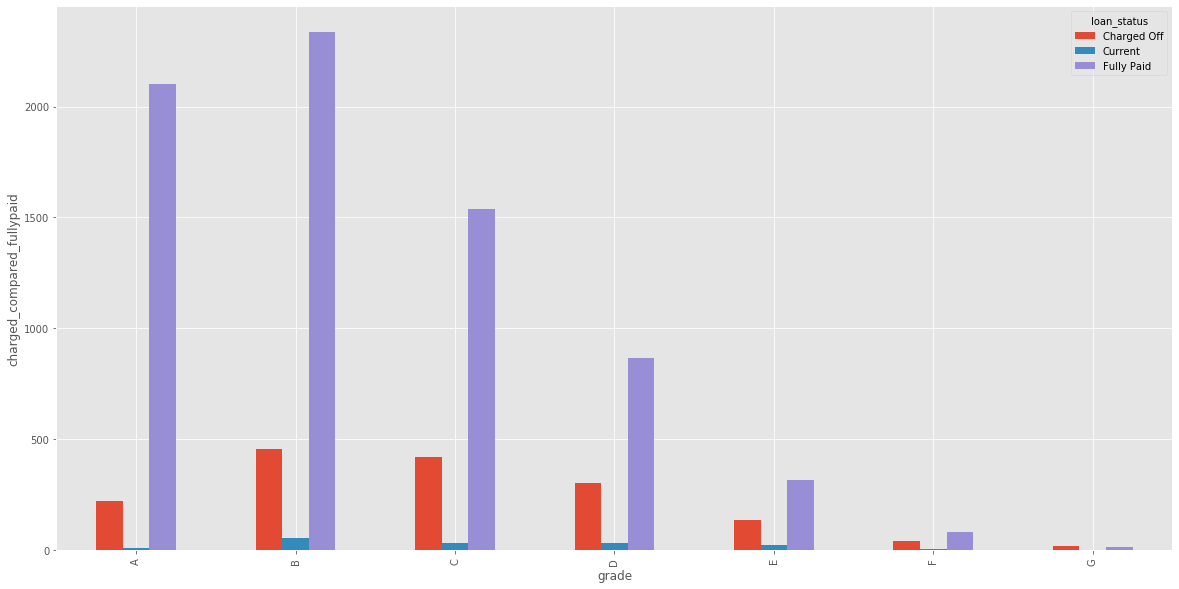

In [241]:
data.groupby(by=['grade','loan_status']).count()['funded_amnt_inv'].unstack().plot.bar(figsize=(20,10))
plt.ylabel('charged_compared_fullypaid')
df = data.groupby(by=['grade','loan_status']).count()['funded_amnt_inv'].unstack()
df['charged_compared_fullypaid'] = df['Fully Paid']/df['Charged Off']
df